# Pymaceuticals Inc.
---
Paul Brichta

### Analysis

- From the Summary Statistics data and the Box Plot visual data we can see that Capomulin and Ramicane had a greater effect in reducing tumor volume than the other two drugs in mice.
- The timeline for mouse l509 we can see that the drug Capomulin takes about 20 days to take effect. I also plotted all of the data for every mouse that was on Capomulin and saw similar results. 
- As mice got heavier their average tumor volume also increased. The positive slope of the linear equation and pretty good correlation coefficient of 0.84 tells us this observation is backed up by the data.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = merged_df[merged_df['Mouse ID'] == 'g989']
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merged_df = merged_df[merged_df['Mouse ID'] != 'g989']
new_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
new_merged_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = new_merged_df.groupby(['Drug Regimen']).mean()
mean_tumor_volume = mean_tumor_volume['Tumor Volume (mm3)']

median_tumor_volume = new_merged_df.groupby(['Drug Regimen']).median()
median_tumor_volume = median_tumor_volume['Tumor Volume (mm3)']

variance_tumor_volume = new_merged_df.groupby(['Drug Regimen']).var()
variance_tumor_volume = variance_tumor_volume['Tumor Volume (mm3)']

stddev_tumor_volume = new_merged_df.groupby(['Drug Regimen']).std()
stddev_tumor_volume = stddev_tumor_volume['Tumor Volume (mm3)']

stderr_tumor_volume = new_merged_df.groupby(['Drug Regimen']).sem()
stderr_tumor_volume = stderr_tumor_volume['Tumor Volume (mm3)']


tumor_volume_stats = pd.DataFrame()
tumor_volume_stats['Mean Tumor Volume'] = mean_tumor_volume
tumor_volume_stats['Median Tumor Volume'] = median_tumor_volume
tumor_volume_stats['Tumor Volume Variance'] = variance_tumor_volume
tumor_volume_stats['Tumor Volume Std. Dev.'] = stddev_tumor_volume
tumor_volume_stats['Tumor Volume Std. Err.'] = stderr_tumor_volume

tumor_volume_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_volume_stats_2 = new_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
tumor_volume_stats_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

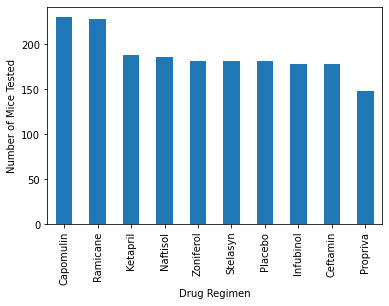

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = new_merged_df.groupby(['Drug Regimen'])['Timepoint'].count()
total_timepoint.sort_values(ascending=False, inplace=True)

total_timepoint_df = pd.DataFrame()
total_timepoint_df['column1'] = total_timepoint
total_timepoint_df.reset_index(inplace=True)

bar_graph = total_timepoint_df.plot.bar(x='Drug Regimen', y='column1')
bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("Number of Mice Tested")
bar_graph.get_legend().remove()


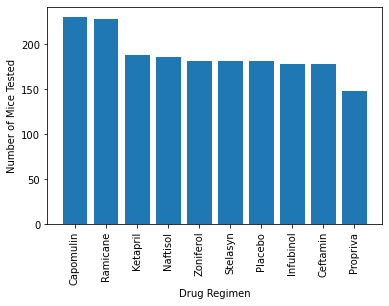

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# total_timepoint = new_merged_df.groupby(['Drug Regimen'])['Timepoint'].count()
# total_timepoint.sort_values(ascending=False, inplace=True)

# total_timepoint_df = pd.DataFrame()
# total_timepoint_df['column1'] = total_timepoint
# total_timepoint_df.reset_index(inplace=True)

plt.bar(total_timepoint_df['Drug Regimen'], total_timepoint_df['column1'])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tick_params(axis='x', labelrotation= 90)


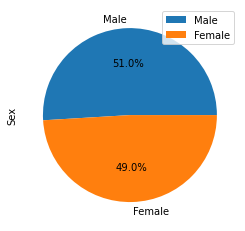

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_counts = new_merged_df['Sex'].value_counts()

mouse_sex_df = pd.DataFrame({"Sex": mouse_sex_counts})

pie_chart = mouse_sex_df.plot(kind='pie', y='Sex', autopct='%1.1f%%')

Text(0.25, 0.5, 'Sex')

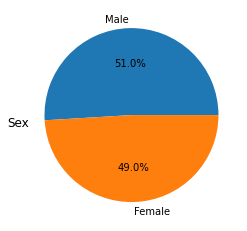

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(mouse_sex_counts, labels=labels, autopct="%1.1f%%")
plt.suptitle('Sex', x=0.25, y=0.5)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = new_merged_df.groupby(['Mouse ID'])['Timepoint'].max()

# greatest_timepoint_df = pd.DataFrame({"Greatest Timepoint": greatest_timepoint})
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)
greatest_timepoint_df.reset_index(inplace=True)
# greatest_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tp_merged_df = pd.merge(new_merged_df, greatest_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')
tp_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = tp_merged_df.loc[tp_merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(final_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])

    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = quartiles[.75] - quartiles[.25]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(drug, outliers)

    

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


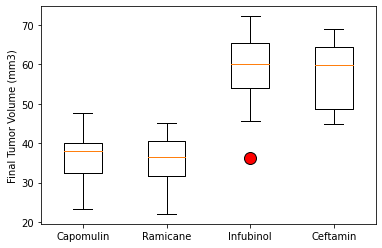

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

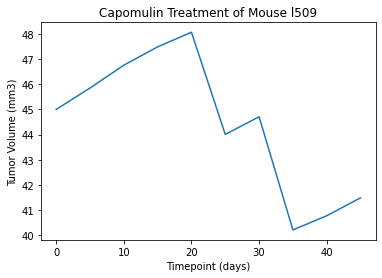

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509_data = new_merged_df.loc[new_merged_df['Mouse ID'] == 'l509']
plt.plot(mouse_l509_data['Timepoint'], mouse_l509_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

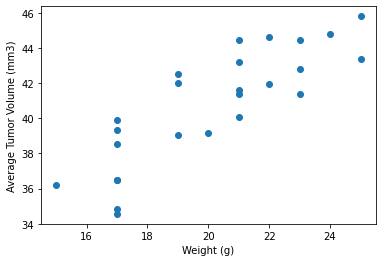

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = new_merged_df.loc[new_merged_df['Drug Regimen'] == 'Capomulin']
capomulin_average = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


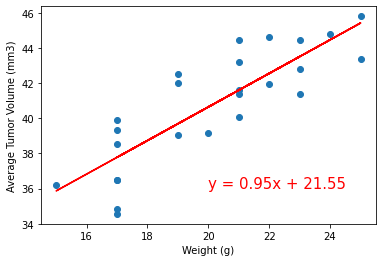

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
